In [1]:
from rdkit.Chem import QED

QED

<module 'rdkit.Chem.QED' from 'c:\\USERS\\ADMIN\\ANACONDA3\\ENVS\\MOL_GJ\\Lib\\site-packages\\rdkit\\Chem\\QED.py'>

In [3]:
from rdkit.Chem import QED
from rdkit import Chem
print(QED.qed(Chem.MolFromSmiles("CC(=O)OC1=CC=CC=C1C(=O)O")))

0.5501217966938848


In [5]:
from simanneal import Annealer
from rdkit import Chem
from rdkit.Chem import QED, Descriptors
import numpy as np

class MoleculeOptimizer(Annealer):
    def __init__(self, target_property, target_value, tolerance, sample_smiles):
        self.target_property = target_property
        self.target_value = target_value
        self.tolerance = tolerance
        self.sample_smiles = sample_smiles
        # self.state = np.random.choice(sample_smiles)
        # super(MoleculeOptimizer, self).__init__()
        initial_state = np.random.choice(sample_smiles)
        super(MoleculeOptimizer, self).__init__(initial_state=initial_state)

    def move(self):
        self.state = np.random.choice(self.sample_smiles)
    
    def energy(self):
        mol = Chem.MolFromSmiles(self.state)
        if mol is None:
            return float('inf')
        if self.target_property == "QED":
            value = QED.qed(mol)
        elif self.target_property == "LogP":
            value = Descriptors.MolLogP(mol)
        elif self.target_property == "SAS":
            value = Descriptors.MolWt(mol) / 100
        else:
            return float('inf')
        return abs(value - self.target_value)

def optimize_molecules(target_property, target_value, tolerance=0.1):
    try:
        sample_smiles = [
            "CC(=O)OC1=CC=CC=C1C(=O)O",
            "CN1C=NC2=C1C(=O)N(C(=O)N2C)C",
            "CCN(CC)C(=O)[C@H]1CN(C)[C@@H]2Cc3c[nH]c4cccc(c34)[C@@H]1C2"
        ]

        print("HEHE")
        
        optimizer = MoleculeOptimizer(target_property, target_value, tolerance, sample_smiles)
        optimizer.steps = 1000
        optimizer.Tmax = 100.0
        optimizer.Tmin = 0.1
        
        print("optimizer", optimizer)

        best_state, best_energy = optimizer.anneal()
        if best_energy <= tolerance:
            return [(best_state, best_energy)], None
        return [], "No molecules found within tolerance"
    except Exception as e:
        return [], f"Error: {str(e)}"

In [12]:
import sys
import os
sys.path.append("D:/e_Drive/research_gj/MOLECULAR/PROJECT/REAL_PROJECT_GJ")

In [13]:
from src.utils import smiles_to_image, compute_properties

In [20]:
import matplotlib.pyplot as plt

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
    66.06934          0.45   100.00%    40.00%     0:00:00     0:00:03

HEHE
optimizer <__main__.MoleculeOptimizer object at 0x000002298A796890>


     0.10000          0.06    50.00%     0.00%     0:00:02     0:00:00

generated:  [(np.str_('CCN(CC)C(=O)[C@H]1CN(C)[C@@H]2Cc3c[nH]c4cccc(c34)[C@@H]1C2'), 0.057870089777695366)]  | error:  None
Generated molecule


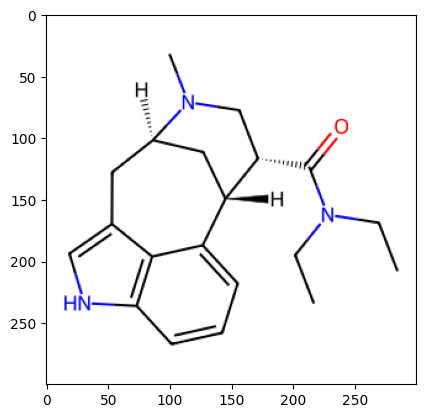

In [23]:
generated, error = optimize_molecules("QED", 1.0, 0.1)

print("generated: ", generated, " | error: ", error)

if error:
    print(error)
    # st.error(error)
else:
    if generated:
        print("Generated molecule")
        # st.subheader("Generated Molecules")
        for smi, energy in generated:
            img, img_error = smiles_to_image(smi)
            if img_error:
                print(img_error)
                # st.error(img_error)
            else:
                properties, prop_error = compute_properties(smi)
                if prop_error:
                    print('prop_error: ', prop_error)
                    # st.error(prop_error)
                else:
                    plt.imshow(img)
                    # st.image(img, caption=f"SMILES: {smi}, {target_property}: {properties[target_property]:.2f}")
